----
### 0. Links and Code Library

- Guide to the Sequential model https://keras.io/getting-started/sequential-model-guide/
- Model evaluation: quantifying the quality of predictions http://scikit-learn.org/stable/modules/model_evaluation.html
- Extended version of this project https://olgabelitskaya.github.io/MLE_ND_P6_V0.html

In [14]:
import numpy as np 
import pandas as pd 
import scipy

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [15]:
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [18]:
import keras as ks
from keras.models import Sequential, load_model, Model

from keras.preprocessing import sequence

from keras.optimizers import SGD, RMSprop

from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D

from keras.layers.embeddings import Embedding

from keras.wrappers.scikit_learn import KerasRegressor

----
### 1. Problem Statement

Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

----
### 2. Datasets and Inputs

#### 2.1 Description by files

##### train.csv and test.csv

- price_doc: sale price (this is the target variable)
- id:transaction id
- timestamp: date of the transaction
- full_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, the floor of the building
- max_floor: number of floors in the building
- wall material
- year built
- number of living rooms
- kitch_sq: kitchen area
- state: apartment condition
- product_type: owner-occupier purchase or investment
- sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighborhood and some features that are constant across each sub-area (known as a Raion). Most of the feature names are self-explanatory, with the following notes. See below for a complete list.

- full_all: subarea population
- male_f, female_f: subarea population by gender
- young_: population younger than working age
- work_: working-age population
- ekder_ : retirement-age population
- nm{all|male|female}: population between n and m years old
- buildcount: buildings in the subarea by construction type or year
- x_count_500: the number of x within 500m of the property
- x_part_500: the share of x within 500m of the property
- sqm: square meters
- cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
- trc_: shopping malls
- prom_: industrial zones
- green_: green zones
- metro_: subway
- avto: distances by car
- mkad_: Moscow Circle Auto Road
- ttk_: Third Transport Ring
- sadovoe_: Garden Ring
- bulvarring: Boulevard Ring
- kremlin_: City Center
- zdvokzaly: Train station
- oilchemistry: Dirty industry
- ts_: Power plant

##### macro.csv

A set of macroeconomic indicators, one for each date.

- timestamp: Transaction timestamp
- oil_urals: Crude Oil Urals (usd/bbl)
- gdp_quart: GDP
- gdp_quart_growth: Real GDP growth
- cpi: Inflation - Consumer Price Index Growth
- ppi: Inflation - Producer Price index Growth
- gdp_deflator: Inflation - GDP deflator
- balance_trade: Trade surplus
- balance_trade_growth: Trade balance (as a percentage of previous year)
- usdrub: Ruble/USD exchange rate
- eurrub: Ruble/EUR exchange rate
- brent: London Brent (usd/bbl)
- net_capital_export: Net import / export of capital
- gdp_annual: GDP at current prices
- gdp_annual_growth: GDP growth (in real terms)
- average_provision_of_build_contract: Provision by orders in Russia (for the developer)
- average_provision_of_build_contract_moscow: Provision by orders in Moscow (for the developer)
- rts: Index RTS / return
- micex: MICEX index / return
- micex_rgbi_tr: MICEX index for government bonds (MICEX RGBI TR) / yield
- micex_cbi_tr: MICEX Index corporate bonds (MICEX CBI TR) / yield
- deposits_value: Volume of household deposits
- deposits_growth: Volume growth of population's deposits
- deposits_rate: Average interest rate on deposits
- mortgage_value: Volume of mortgage loans
- mortgage_growth: Growth of mortgage lending
- mortgage_rate: Weighted average rate of mortgage loans
- grp: GRP of the subject of Russian Federation where Apartment is located
- grp_growth: Growth of gross regional product of the subject of the Russian Federation where Apartment is located
- income_per_cap: Average income per capita
- real_dispos_income_per_cap_growth: Growth in real disposable income of Population
- salary: Average monthly salary
- salary_growth: Growth of nominal wages
- fixed_basket: Cost of a fixed basket of consumer goods and services for inter-regional comparisons of purchasing power
- retail_trade_turnover: Retail trade turnover
- retail_trade_turnover_per_cap: Retail trade turnover per capita
- retail_trade_turnover_growth: Retail turnover (in comparable prices in% to corresponding period of previous year)
- labor_force: Size of labor force
- unemployment: Unemployment rate
- employment: Employment rate
- invest_fixed_capital_per_cap: Investments in fixed capital per capita
- invest_fixed_assets: Absolute volume of investments in fixed assets
- profitable_enterpr_share: Share of profitable enterprises
- unprofitable_enterpr_share: The share of unprofitable enterprises
- share_own_revenues: The share of own revenues in the total consolidated budget revenues
- overdue_wages_per_cap: Overdue wages per person
- fin_res_per_cap: The financial results of companies per capita
- marriages_per_1000_cap: Number of marriages per 1,000 people
- divorce_rate: The divorce rate / growth rate
- construction_value: Volume of construction work performed (million rubles)
- invest_fixed_assets_phys: The index of physical volume of investment in fixed assets (in comparable prices in% to -
- the corresponding month of Previous year)
- pop_natural_increase: Rate of natural increase / decrease in Population (1,000 persons)
- pop_migration: Migration increase (decrease) of population
- pop_total_inc: Total population growth
- childbirth: Childbirth
- mortality: Mortality
- housing_fund_sqm: Housing Fund (sqm)
- lodging_sqm_per_cap: Lodging (sqm / pax)
- water_pipes_share: Plumbing availability (pax)
- baths_share: Bath availability (pax)
- sewerage_share: Canalization availability
- gas_share:Gas (mains, liquefied) availability
- hot_water_share: Hot water availability
- electric_stove_share: Electric heating for the floor
- heating_share: Heating availability
- old_house_share: Proportion of old and dilapidated housing, percent
- average_life_exp: Average life expectancy
- infant_mortarity_per_1000_cap: Infant mortality rate (per 1,000 children aged up to one year)
- perinatal_mort_per_1000_cap: Perinatal mortality rate (per 1,000 live births)
- incidence_population: Overall incidence of the total population
- rent_price_4+room_bus: rent price for 4-room apartment, business class
- rent_price_3room_bus: rent price for 3-room apartment, business class
- rent_price_2room_bus: rent price for 2-room apartment, business class
- rent_price_1room_bus: rent price for 1-room apartment, business class
- rent_price_3room_eco: rent price for 3-room apartment, econom class
- rent_price_2room_eco: rent price for 2-room apartment, econom class
- rent_price_1room_eco: rent price for 1-room apartment, econom class
- load_of_teachers_preschool_per_teacher: Load of teachers of preschool educational institutions (number of children per 100 teachers)
- child_on_acc_pre_school: Number of children waiting for the determination to pre-school educational institutions, for capacity of 100
- load_of_teachers_school_per_teacher: Load on teachers in high school (number of pupils in hugh school for 100 teachers)
- students_state_oneshift: Proportion of pupils in high schools with one shift, of the total number of pupils in high schools
- modern_education_share: Share of state (municipal) educational organizations, corresponding to modern requirements of education in the total number of high schools
- old_education_build_share: The share of state (municipal) educational organizations, buildings are in disrepair and in need of major repairs of the total number
- provision_doctors: Provision (relative number) of medical doctors in area
- provision_nurse: Provision of nursing staff
- load_on_doctors: The load on doctors (number of visits per physician)
- power_clinics: Capacity of outpatient clinics
- hospital_beds_available_per_cap: Availability of hospital beds per 100 000 persons
- hospital_bed_occupancy_per_year: Average occupancy rate of the hospital beds during a year
- provision_retail_space_sqm: Retail space
- provision_retail_space_modern_sqm: Provision of population with retail space of modern formats, square meter
- retail_trade_turnover_per_cap: Retail trade turnover per capita
- turnover_catering_per_cap: Turnover of catering industry per person
- theaters_viewers_per_1000_cap: Number of theaters viewers per 1000 population
- seats_theather_rfmin_per_100000_cap: Total number of seats in Auditorium of the Ministry of Culture Russian theaters per 100,000 population
- museum_visitis_per_100_cap: Number of visits to museums per 1000 of population
- bandwidth_sports: Capacity of sports facilities
- population_reg_sports_share: Proportion of population regularly doing sports
- students_reg_sports_share: Proportion of pupils and students regularly doing sports in the total number
- apartment_build: City residential apartment construction
- apartment_fund_sqm: City residential apartment fund

#### 2.2 Data Loading and Displaying

In [19]:
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
macro[100:103].T[1:10]

,100,101,102
oil_urals,82.87,82.87,82.87
gdp_quart,9995.8,9995.8,9995.8
gdp_quart_growth,4.1,4.1,4.1
cpi,319.8,319.8,319.8
ppi,350.2,350.2,350.2
gdp_deflator,NaN,NaN,NaN
balance_trade,16.604,16.604,16.604
balance_trade_growth,14.1,14.1,14.1
usdrub,29.1525,29.0261,29.1


In [21]:
macro['salary'] = macro['salary'].interpolate(method='linear')

In [22]:
train[200:203].T[1:10]

,200,201,202
timestamp,2011-10-25,2011-10-25,2011-10-25
full_sq,38,33,30
life_sq,19,14,18
floor,15,8,3
max_floor,NaN,NaN,NaN
material,NaN,NaN,NaN
build_year,NaN,NaN,NaN
num_room,NaN,NaN,NaN
kitch_sq,NaN,NaN,NaN


In [23]:
train.isnull().sum()[:50]

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [24]:
train.isnull().sum()[50:100]

ekder_all                                   0
ekder_male                                  0
ekder_female                                0
0_6_all                                     0
0_6_male                                    0
0_6_female                                  0
7_14_all                                    0
7_14_male                                   0
7_14_female                                 0
0_17_all                                    0
0_17_male                                   0
0_17_female                                 0
16_29_all                                   0
16_29_male                                  0
16_29_female                                0
0_13_all                                    0
0_13_male                                   0
0_13_female                                 0
raion_build_count_with_material_info     4991
build_count_block                        4991
build_count_wood                         4991
build_count_frame                 

In [25]:
train.isnull().sum()[100:150]

railroad_station_avto_km             0
railroad_station_avto_min            0
ID_railroad_station_avto             0
public_transport_station_km          0
public_transport_station_min_walk    0
water_km                             0
water_1line                          0
mkad_km                              0
ttk_km                               0
sadovoe_km                           0
bulvar_ring_km                       0
kremlin_km                           0
big_road1_km                         0
ID_big_road1                         0
big_road1_1line                      0
big_road2_km                         0
ID_big_road2                         0
railroad_km                          0
railroad_1line                       0
zd_vokzaly_avto_km                   0
ID_railroad_terminal                 0
bus_terminal_avto_km                 0
ID_bus_terminal                      0
oil_chemistry_km                     0
nuclear_reactor_km                   0
radiation_km             

----
### 3. Solution Statement

#### 3.1 Selection of features

In [98]:
X_list_num = ['full_sq', 'num_room', 'floor', 'area_m', 
              'timestamp',
              'preschool_education_centers_raion', 'school_education_centers_raion', 
              'children_preschool', 'children_school',
              'shopping_centers_raion', 'healthcare_centers_raion', 
              'office_raion', 'sport_objects_raion',
              'public_transport_station_min_walk', 
              'railroad_station_walk_min', 'railroad_station_avto_km', 'bus_terminal_avto_km',
              'cafe_count_500',
              'kremlin_km', 'workplaces_km', 
              'ID_metro', 'metro_km_avto', 'metro_min_walk', 
              'public_healthcare_km', 'shopping_centers_km', 'big_market_km',
              'fitness_km', 'swim_pool_km', 'stadium_km', 'park_km',
              'kindergarten_km', 'school_km', 'preschool_km', 'university_km', 'additional_education_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'big_road1_km', 'big_road2_km',
              'detention_facility_km', 'cemetery_km', 'oil_chemistry_km', 'radiation_km',
              'raion_popul', 'work_all', 'young_all', 'ekder_all']
X_list_cat = ['sub_area', 'ecology', 'big_market_raion']

features_train = train[X_list_num]
features_test = test[X_list_num]
target_train = train['price_doc']

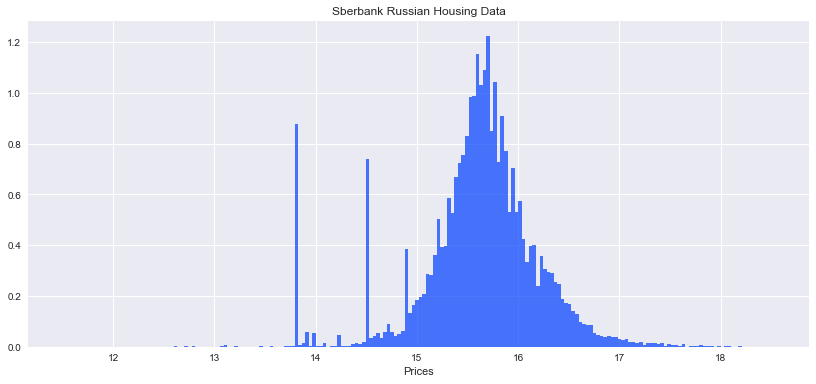

In [99]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(14, 6))

plt.hist(np.log(target_train), bins=200, normed=True, alpha=0.7)

plt.xlabel("Prices")
plt.title('Sberbank Russian Housing Data');

In [100]:
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(features_train.keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  48
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


#### 3.2 Fill in missing values

In [101]:
features_train.isnull().sum()

full_sq                                 0
num_room                             9572
floor                                 167
area_m                                  0
timestamp                               0
preschool_education_centers_raion       0
school_education_centers_raion          0
children_preschool                      0
children_school                         0
shopping_centers_raion                  0
healthcare_centers_raion                0
office_raion                            0
sport_objects_raion                     0
public_transport_station_min_walk       0
railroad_station_walk_min              25
railroad_station_avto_km                0
bus_terminal_avto_km                    0
cafe_count_500                          0
kremlin_km                              0
workplaces_km                           0
ID_metro                                0
metro_km_avto                           0
metro_min_walk                         25
public_healthcare_km              

In [102]:
features_test.isnull().sum()

full_sq                               0
num_room                              0
floor                                 0
area_m                                0
timestamp                             0
preschool_education_centers_raion     0
school_education_centers_raion        0
children_preschool                    0
children_school                       0
shopping_centers_raion                0
healthcare_centers_raion              0
office_raion                          0
sport_objects_raion                   0
public_transport_station_min_walk     0
railroad_station_walk_min            34
railroad_station_avto_km              0
bus_terminal_avto_km                  0
cafe_count_500                        0
kremlin_km                            0
workplaces_km                         0
ID_metro                              0
metro_km_avto                         0
metro_min_walk                       34
public_healthcare_km                  0
shopping_centers_km                   0


In [103]:
df = pd.DataFrame(features_train, columns=X_list_num)
df['prices'] = target_train

df = df.dropna(subset=['num_room'])

df['metro_min_walk'] = df['metro_min_walk'].interpolate(method='linear')
features_test['metro_min_walk'] = features_test['metro_min_walk'].interpolate(method='linear')

df['railroad_station_walk_min'] = df['railroad_station_walk_min'].interpolate(method='linear')
features_test['railroad_station_walk_min'] = \
features_test['railroad_station_walk_min'].interpolate(method='linear')

df['floor'] = df['floor'].fillna(df['floor'].median())
len(df)

20899

#### 3.3 Categorical and macro features

In [104]:
ID_metro_cat = pd.factorize(df['ID_metro'])
df['ID_metro'] = ID_metro_cat[0]

In [105]:
ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219
features_test['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [106]:
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

In [107]:
df['timestamp'].replace(usdrub_pairs,inplace=True)
features_test['timestamp'].replace(usdrub_pairs,inplace=True)

In [108]:
df.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
features_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

#### 3.4 Displaying correlation

In [109]:
pearson = df.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
sport_objects_raion                  0.256412
ID_metro                             0.250502
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
school_education_centers_raion       0.193896
healthcare_centers_raion             0.185419
shopping_centers_km                 -0.182459
public_healthcare_km              

In [110]:
features_list2 = corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:32].index.values.tolist()
print(features_list2)

['full_sq', 'num_room', 'kremlin_km', 'sport_objects_raion', 'ID_metro', 'stadium_km', 'detention_facility_km', 'university_km', 'theater_km', 'workplaces_km', 'swim_pool_km', 'exhibition_km', 'radiation_km', 'museum_km', 'park_km', 'metro_min_walk', 'fitness_km', 'metro_km_avto', 'school_education_centers_raion', 'healthcare_centers_raion', 'shopping_centers_km', 'public_healthcare_km', 'big_road2_km', 'bus_terminal_avto_km', 'ekder_all', 'area_m', 'school_km', 'preschool_education_centers_raion', 'preschool_km', 'office_raion', 'additional_education_km', 'raion_popul']


#### 3.5 Scale, Shuffle and Split the Data

In [111]:
target_train = df['prices']
features_train = df.drop('prices', 1)

In [112]:
target_train2 = target_train
features_train2 = features_train[features_list2]
features_test2 = features_test[features_list2]

In [113]:
target_train = target_train.as_matrix()
features_train = features_train.as_matrix()
features_test = features_test.as_matrix()

target_train2 = target_train2.as_matrix()
features_train2 = features_train2.as_matrix()
features_tes2t = features_test2.as_matrix()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, 
                                                    test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((16719, 48), (4180, 48))

In [115]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_train2, target_train2, 
                                                        test_size = 0.2, random_state = 1)
X_train2.shape, X_test2.shape

((16719, 32), (4180, 32))

In [116]:
x_scale = RobustScaler()
X_train = x_scale.fit_transform(X_train)
X_test = x_scale.transform(X_test)

In [117]:
x_scale2 = RobustScaler()
X_train2 = x_scale2.fit_transform(X_train2)
X_test2 = x_scale2.transform(X_test2)

In [46]:
# y_scale = RobustScaler()
# y_train = y_scale.fit_transform(y_train.reshape(-1,1))
# y_test = y_scale.transform(y_test.reshape(-1,1))

### 4. Benchmark Models

#### 4.1 Regressors

In [50]:
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

In [118]:
param_grid_gbr = {'max_depth': [4, 5, 6], 
                  'n_estimators': range(48, 481, 48)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), 
                              param_grid_gbr, n_jobs=5).fit(X_train, y_train)

In [119]:
gridsearch_gbr.best_params_

{'max_depth': 4, 'n_estimators': 240}

In [ ]:
param_grid_gbr2 = {'max_depth': [4, 5, 6], 
                  'n_estimators': range(32, 321, 32)}
gridsearch_gbr2 = GridSearchCV(GradientBoostingRegressor(), 
                               param_grid_gbr2, n_jobs=5).fit(X_train2, y_train2)

In [ ]:
gridsearch_gbr2.best_params_

In [120]:
param_grid_br = {'n_estimators': range(48, 481, 48)}

gridsearch_br = GridSearchCV(BaggingRegressor(), 
                             param_grid_br, n_jobs=5).fit(X_train, y_train)

In [121]:
gridsearch_br.best_params_

{'n_estimators': 432}

In [ ]:
param_grid_br2 = {'n_estimators': range(32, 321, 32)}

gridsearch_br2 = GridSearchCV(BaggingRegressor(), 
                              param_grid_br2, n_jobs=5).fit(X_train2, y_train2)

In [43]:
gridsearch_br2.best_params_

{'n_estimators': 224}

In [137]:
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=240), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=432), 
                                   X_train, X_test, y_train)

In [138]:
print('48 features')
scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

48 features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.84429421648
EV score. Test:  0.719319763087
---------
R2 score. Train:  0.84429421648
R2 score. Test:  0.719256133928
---------
MSE score. Train:  3.66979708455e+12
MSE score. Test:  7.28016974254e+12
---------
MAE score. Train:  1186631.54657
MAE score. Test:  1434599.67269
---------
MdAE score. Train:  641967.791817
MdAE score. Test:  714487.483539
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.956651669537
EV score. Test:  0.714707600401
---------
R2 score. Train:  0.956623773883
R2 score. Test:  0.714291901504
---------
MSE score. Train:  1.02232521198e+12
MSE score. Test:  7.40890079975e+12
---------
MAE score. Train:  523919.781061
MAE score. Test:  1403149.94567
---------
MdAE score. Train:  223803.393519
MdAE score. Test:  619109.662037


In [214]:
y_train_gbr2, y_test_gbr2 = regression(GradientBoostingRegressor(max_depth=3, n_estimators=256), 
                                       X_train2, X_test2, y_train2)

y_train_br2, y_test_br2 = regression(BaggingRegressor(n_estimators=224), 
                                     X_train2, X_test2, y_train2)

In [215]:
print('32 features')
scores('GradientBoostingRegressor', y_train2, y_test2, y_train_gbr2, y_test_gbr2)
scores('BaggingRegressor', y_train2, y_test2, y_train_br2, y_test_br2)

32 features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.789578056061
EV score. Test:  0.708912720596
---------
R2 score. Train:  0.789578056061
R2 score. Test:  0.708907654964
---------
MSE score. Train:  4.95939083916e+12
MSE score. Test:  7.54852354306e+12
---------
MAE score. Train:  1358301.12535
MAE score. Test:  1508623.53593
---------
MdAE score. Train:  722859.410663
MdAE score. Test:  775310.803135
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.9490050393
EV score. Test:  0.704996485359
---------
R2 score. Train:  0.948976718839
R2 score. Test:  0.704646096795
---------
MSE score. Train:  1.20255705483e+12
MSE score. Test:  7.65903305221e+12
---------
MAE score. Train:  607066.762265
MAE score. Test:  1461219.33277
---------
MdAE score. Train:  305119.018701
MdAE score. Test:  678310.780134


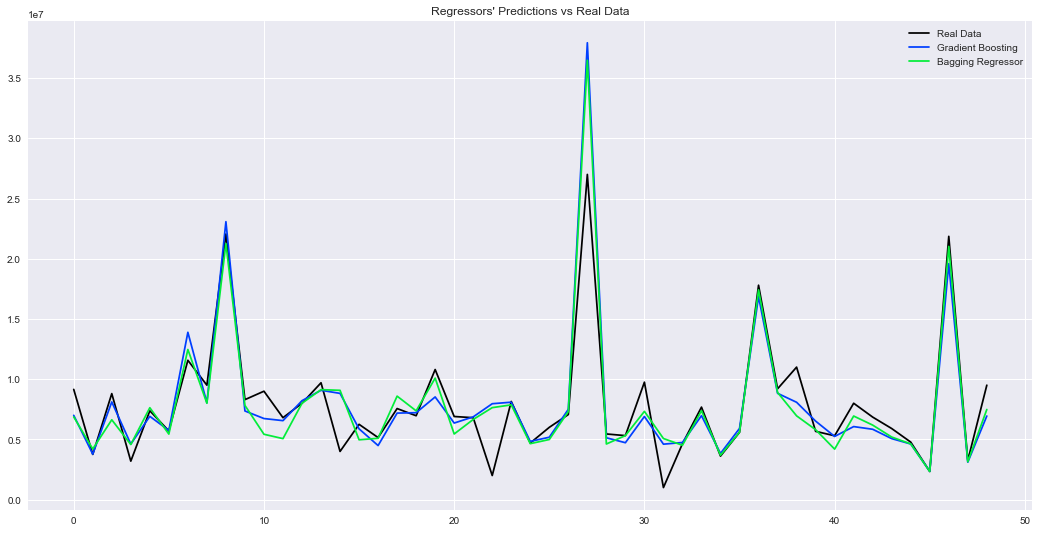

In [136]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')

plt.legend()
plt.title("Regressors' Predictions vs Real Data"); 

#### 4.2 Neural Networks

In [139]:
def loss_plot(fit_history):
    plt.figure(figsize=(18, 9))

    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 9))

    plt.plot(fit_history.history['mean_absolute_error'], label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error'); 

In [182]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(48, input_dim=48, kernel_initializer='normal', activation='relu'))
    model.add(Dense(48, kernel_initializer='normal', activation='relu'))
    
    model.add(Dropout(0.25))
    
    model.add(Dense(96, kernel_initializer='normal', activation='relu'))
    model.add(Dense(96, kernel_initializer='normal', activation='relu'))
    
    model.add(Dropout(0.25))
    
#    model.add(Dense(192, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(192, kernel_initializer='normal', activation='relu'))
    
#    model.add(Dropout(0.1))
    
    model.add(Dense(384, kernel_initializer='normal', activation='relu'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [183]:
mlp_model = mlp_model()

mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=80, batch_size=48, verbose=0)

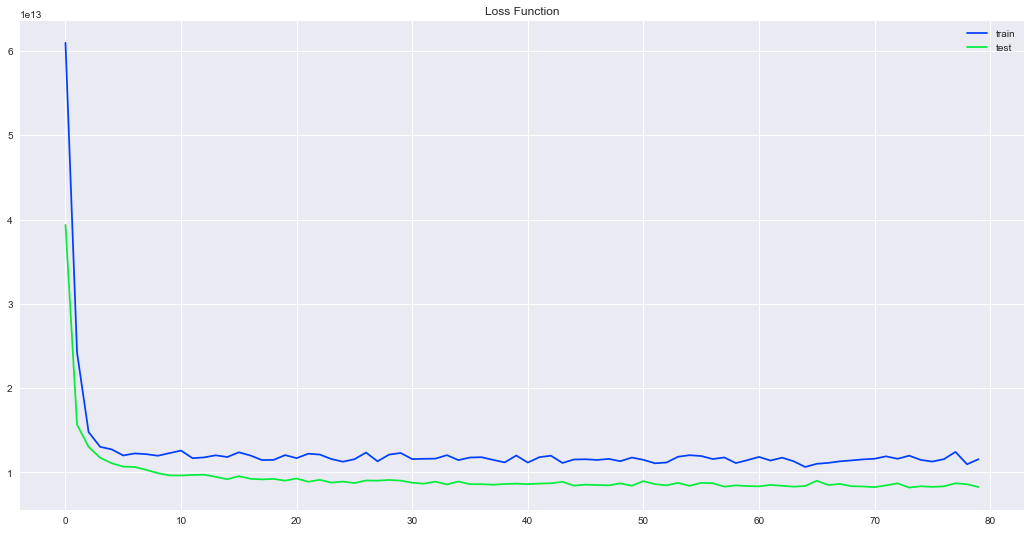

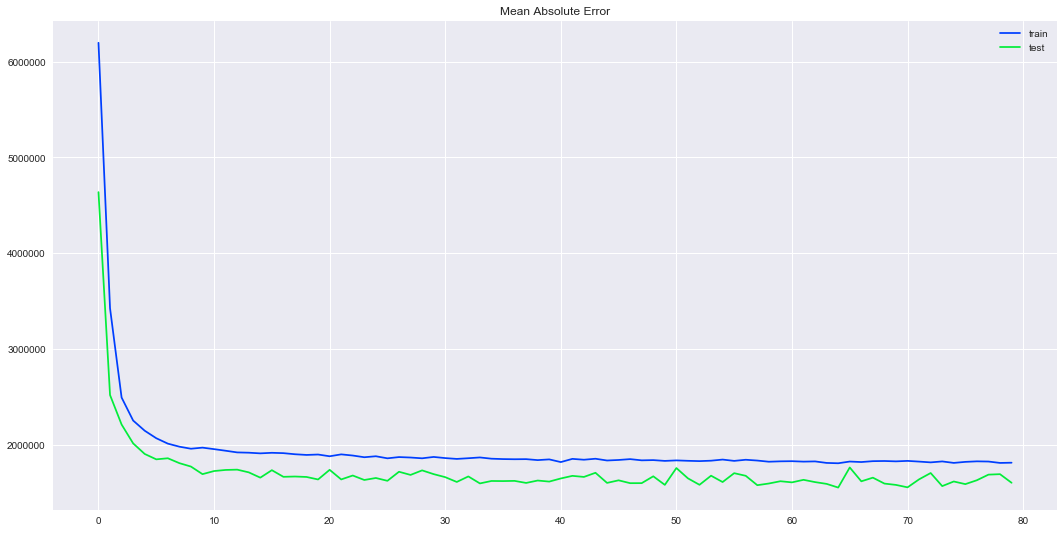

In [184]:
loss_plot(mlp_history)
mae_plot(mlp_history)

In [176]:
y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)

scores('MLP Model #1', y_train, y_test, y_train_mlp, y_test_mlp)

_______________________________________
MLP Model #1
_______________________________________
EV score. Train:  0.601083078461
EV score. Test:  0.678712856051
---------
R2 score. Train:  0.601057629373
R2 score. Test:  0.678368762087
---------
MSE score. Train:  9.40258939349e+12
MSE score. Test:  8.34044938994e+12
---------
MAE score. Train:  1529239.42515
MAE score. Test:  1562551.59563
---------
MdAE score. Train:  765321.0
MdAE score. Test:  797455.5


----

In [190]:
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(752, input_dim=48, kernel_initializer='normal', activation='relu'))   
    model.add(Dense(752, kernel_initializer='normal', activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(192, kernel_initializer='normal', activation='relu'))  
    model.add(Dense(192, kernel_initializer='normal', activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(48, kernel_initializer='normal', activation='relu'))
    model.add(Dense(48, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [191]:
mlp_model2 = mlp_model2()

mlp_history2 = mlp_model2.fit(X_train, y_train, validation_data=(X_test, y_test),
                            nb_epoch=130, batch_size=16, verbose=0)

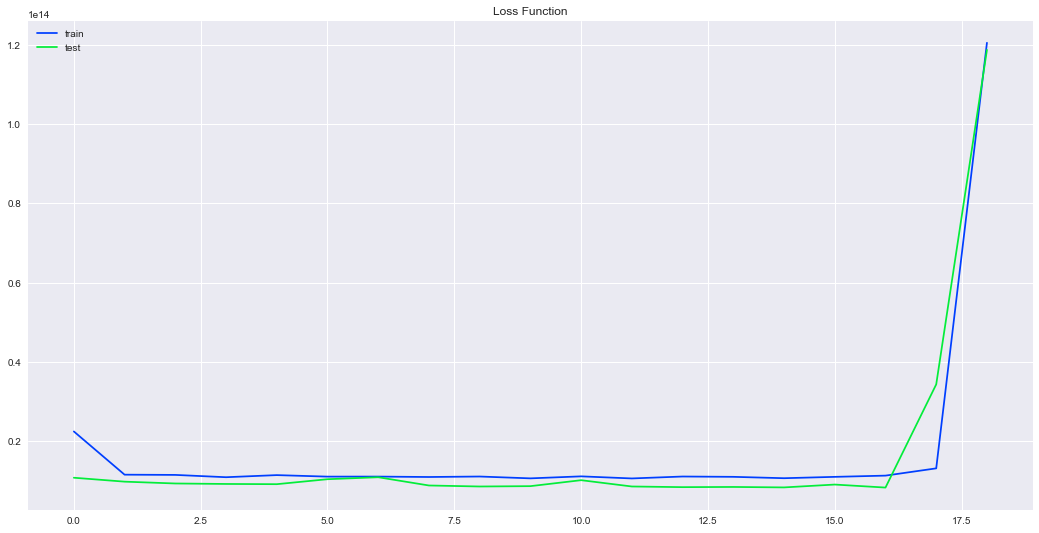

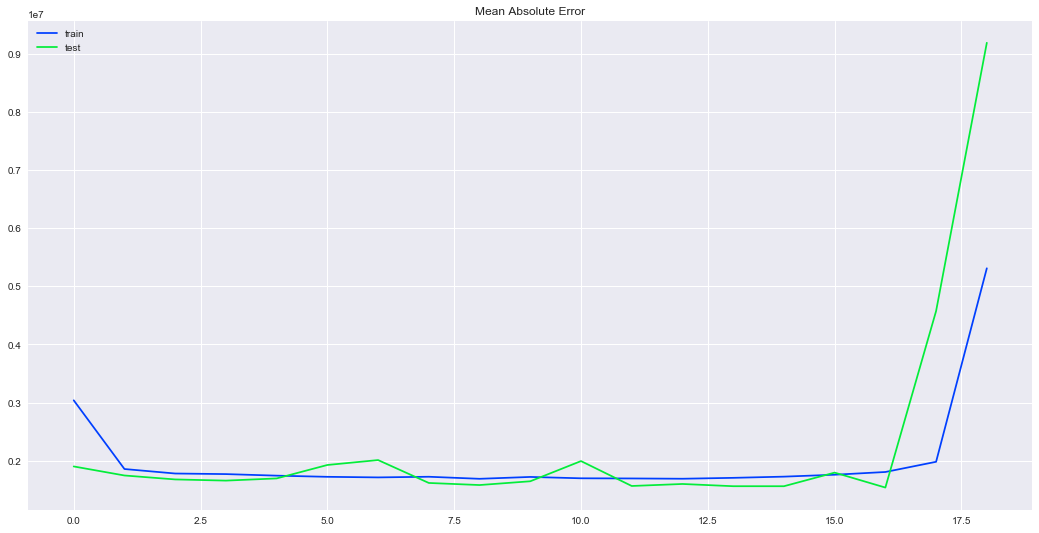

In [192]:
loss_plot(mlp_history2)
mae_plot(mlp_history2)

In [193]:
y_train_mlp2 = mlp_model2.predict(X_train)
y_test_mlp2 = mlp_model2.predict(X_test)

scores('MLP Model #2', y_train, y_test, y_train_mlp2, y_test_mlp2)

_______________________________________
MLP Model #2
_______________________________________


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP #1')
plt.plot(y_test_mlp2[1:50], label='MLP #2')

plt.legend()
plt.title("Neural Networks' Predictions vs Real Data"); 

----

#### 4.3 MLP Regressor

In [206]:
mlpr = MLPRegressor(hidden_layer_sizes=(235,), max_iter=210, solver='lbfgs', 
                    alpha=0.01, verbose=10)
mlpr.fit(X_train, y_train);

In [207]:
y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

In [208]:
scores('MLP Regressor', y_train, y_test, y_train_mlpr, y_test_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score. Train:  0.678205058188
EV score. Test:  0.675117757249
---------
R2 score. Train:  0.678186921931
R2 score. Test:  0.675110805439
---------
MSE score. Train:  7.58474520964e+12
MSE score. Test:  8.42493379111e+12
---------
MAE score. Train:  1556761.73607
MAE score. Test:  1593539.47158
---------
MdAE score. Train:  847920.135448
MdAE score. Test:  841613.364303


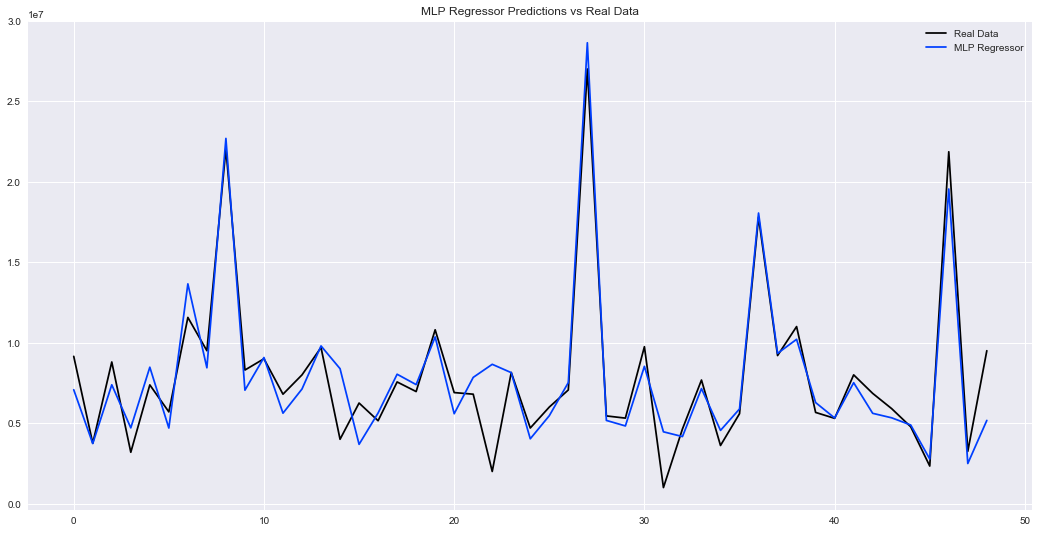

In [209]:
plt.figure(figsize = (18, 9))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlpr[1:50], label='MLP Regressor')
# plt.plot(y_test_cnn[1:50], label='CNN')

plt.legend()
plt.title("MLP Regressor Predictions vs Real Data"); 

----
### 5. Evaluation Metrics
- explained variance regression score
- coefficient of determination
- mean squared error
- mean absolute error
- median absolute error

In [51]:
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))

#### 5.1 Regressors

In [157]:
scores('Gradient Boosting Regressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('Bagging Regressor', y_train, y_test, y_train_br, y_test_br)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score. Train:  0.831495908788
EV score. Test:  0.726158723488
---------
R2 score. Train:  0.831495908788
R2 score. Test:  0.726113500783
---------
MSE score. Train:  3.97143772494e+12
MSE score. Test:  7.10234646399e+12
---------
MAE score. Train:  1230232.52176
MAE score. Test:  1433906.81591
---------
MdAE score. Train:  657965.782649
MdAE score. Test:  727623.926667
_______________________________________
Bagging Regressor
_______________________________________
EV score. Train:  0.956448346482
EV score. Test:  0.712119815803
---------
R2 score. Train:  0.956415557565
R2 score. Test:  0.711663900118
---------
MSE score. Train:  1.02723261888e+12
MSE score. Test:  7.47704938103e+12
---------
MAE score. Train:  525658.686897
MAE score. Test:  1405932.75952
---------
MdAE score. Train:  224626.659574
MdAE score. Test:  631560.537234


#### 5.2 Neural Networks

In [635]:
scores('MLP Model #1', y_train, y_test, y_train_mlp, y_test_mlp)
scores('MLP Model #2', y_train, y_test, y_train_mlp2, y_test_mlp2)

_______________________________________
MLP Model #1
_______________________________________
EV score. Train:  0.686047467632
EV score. Test:  0.701190091343
---------
R2 score. Train:  0.684045077227
R2 score. Test:  0.699760907283
---------
MSE score. Train:  7.44667557126e+12
MSE score. Test:  7.78571439122e+12
---------
MAE score. Train:  1533181.3783
MAE score. Test:  1595256.31459
---------
MdAE score. Train:  884725.0
MdAE score. Test:  897066.0
_______________________________________
MLP Model #2
_______________________________________
EV score. Train:  0.669338387827
EV score. Test:  0.698571958113
---------
R2 score. Train:  0.659214258213
R2 score. Test:  0.689863274142
---------
MSE score. Train:  8.0319079574e+12
MSE score. Test:  8.04237698665e+12
---------
MAE score. Train:  1588241.24558
MAE score. Test:  1658279.60395
---------
MdAE score. Train:  975445.25
MdAE score. Test:  983660.625


#### 5.3 MLP Regressor

In [636]:
scores('MLP Regressor', y_train, y_test, y_train_mlpr, y_test_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score. Train:  0.699210414027
EV score. Test:  0.675573271836
---------
R2 score. Train:  0.699206822868
R2 score. Test:  0.675429949932
---------
MSE score. Train:  7.08933155556e+12
MSE score. Test:  8.41665782728e+12
---------
MAE score. Train:  1536448.32898
MAE score. Test:  1581251.35849
---------
MdAE score. Train:  837366.2058
MdAE score. Test:  838522.82229


----
### 6. Predictions

In [158]:
scale = RobustScaler()
features_train = scale.fit_transform(features_train)
features_test = scale.transform(features_test)

In [159]:
features_test.shape

(7662, 47)

In [160]:
reg = GradientBoostingRegressor(max_depth=4, n_estimators=188)
reg.fit(features_train, target_train)

target_train_predict = reg.predict(features_train)
target_test_predict = reg.predict(features_test)

In [161]:
print("_______________________________________")
print("Gradient Boosting  Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict))

_______________________________________
Gradient Boosting  Regressor
_______________________________________
EV score. Train:  0.825254997608
---------
R2 score. Train:  0.825254997608
---------
MSE score. Train:  4.20120080321e+12
---------
MAE score. Train:  1254759.2678
---------
MdAE score. Train:  677389.719779


----

In [162]:
reg1 = BaggingRegressor(n_estimators=188)
reg1.fit(features_train, target_train)

target_train_predict1 = reg1.predict(features_train)
target_test_predict1 = reg1.predict(features_test)

In [163]:
print("_______________________________________")
print("Bagging  Regressor")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict1))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict1))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict1))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict1))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict1))

_______________________________________
Bagging  Regressor
_______________________________________
EV score. Train:  0.958363500922
---------
R2 score. Train:  0.958333667264
---------
MSE score. Train:  1.00173754993e+12
---------
MAE score. Train:  517886.205126
---------
MdAE score. Train:  223698.542553


----

In [650]:
target_train_predict2 = mlp_model.predict(features_train)
target_test_predict2 = mlp_model.predict(features_test)

In [651]:
print("_______________________________________")
print("MLP #2")
print("_______________________________________")
print("EV score. Train: ", explained_variance_score(target_train, target_train_predict2))
print("---------")
print("R2 score. Train: ", r2_score(target_train, target_train_predict2))
print("---------")
print("MSE score. Train: ", mean_squared_error(target_train, target_train_predict2))
print("---------")
print("MAE score. Train: ", mean_absolute_error(target_train, target_train_predict2))
print("---------")
print("MdAE score. Train: ", median_absolute_error(target_train, target_train_predict2))

_______________________________________
MLP #2
_______________________________________
EV score. Train:  0.688963214856
---------
R2 score. Train:  0.686762981949
---------
MSE score. Train:  7.53081114665e+12
---------
MAE score. Train:  1549711.46548
---------
MdAE score. Train:  893194.0


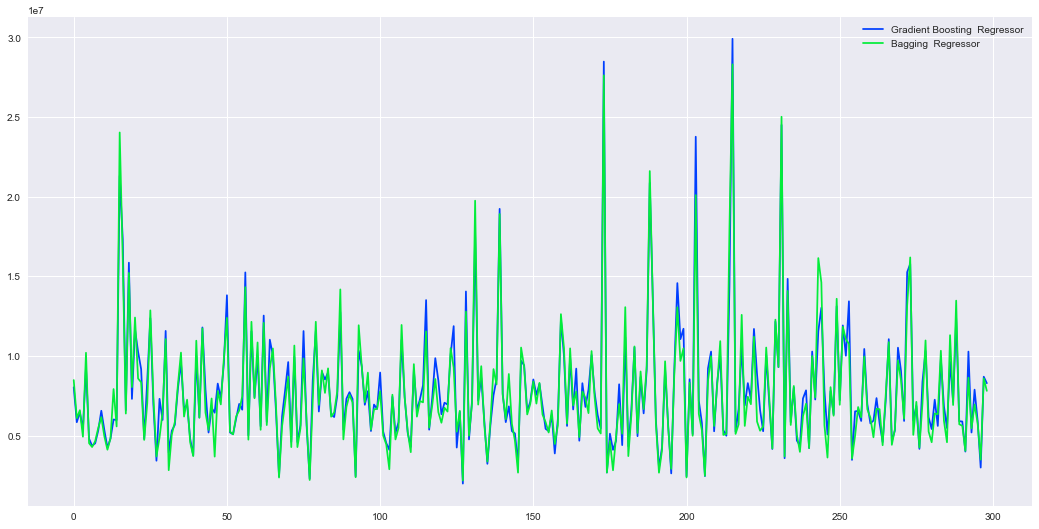

In [164]:
plt.figure(figsize = (18, 9))

plt.plot(target_test_predict[1:300], label='Gradient Boosting  Regressor')
plt.plot(target_test_predict1[1:300], label='Bagging  Regressor')
# plt.plot(target_test_predict2[1:300], label='MLP #2')

plt.legend()

----
### 7. Submission

In [165]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
target_predict = ["{0:.2f}".format(x) for x in target_test_predict]

submission = pd.DataFrame({"id": test['id'], "price_doc": target_predict})
print(submission[0:20])

submission.to_csv('kaggle_sberbank_housing44.csv', index=False)


       id    price_doc
0   30474   5498334.78
1   30475   8030593.95
2   30476   5835315.37
3   30477   6464037.66
4   30478   5393370.55
5   30479   9321275.95
6   30480   4799011.09
7   30481   4355905.35
8   30482   4508733.53
9   30483   5316871.02
10  30484   6555490.79
11  30485   5335447.12
12  30486   4236728.59
13  30487   4808074.54
14  30488   6006570.99
15  30489   5969962.09
16  30490  21308807.21
17  30491  17323746.14
18  30492   6596975.65
19  30493  15854330.27


----

In [166]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
target_predict1 = ["{0:.2f}".format(x) for x in target_test_predict1]

submission1 = pd.DataFrame({"id": test['id'], "price_doc": target_predict1})
print(submission1[0:20])
submission1.to_csv('kaggle_sberbank_housing45.csv', index=False)

       id    price_doc
0   30474   5698385.26
1   30475   8480934.22
2   30476   6093032.11
3   30477   6589085.82
4   30478   4925624.99
5   30479  10195865.19
6   30480   4519103.48
7   30481   4276684.65
8   30482   4644013.15
9   30483   5473608.63
10  30484   6157336.46
11  30485   4944230.53
12  30486   4110122.54
13  30487   4821441.57
14  30488   7919605.79
15  30489   5571726.48
16  30490  24031655.47
17  30491  16055620.05
18  30492   6380112.72
19  30493  15213122.78


----

In [655]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
target_predict2 = [np.round(target_test_predict2[i][0],2) for i in range(len(target_test_predict2))]

submission2 = pd.DataFrame({"id": test['id'], "price_doc": target_predict2})
print(submission2[0:20])

submission2.to_csv('kaggle_sberbank_housing31.csv', index=False)

       id   price_doc
0   30474  5419721.00
1   30475  8464204.00
2   30476  5051652.00
3   30477  6996756.00
4   30478  5483668.50
5   30479  9283588.00
6   30480  4719140.00
7   30481  4220306.50
8   30482  4576429.50
9   30483  5700473.00
10  30484  6528224.50
11  30485  5452350.50
12  30486  6215309.00
13  30487  5301273.50
14  30488  6874589.00
15  30489  5870743.00
16  30490 21279924.00
17  30491 17378748.00
18  30492  6964022.00
19  30493 16876764.00
